Data Preparation

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#Check duplicate calues
duplicata_value=df.duplicated().sum()
duplicata_value

3854

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

In [12]:
#Convert the categorial variables to numerical using LabelEncoder
label_encoder={}
for column in df.select_dtypes(include=["object"]).columns:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [14]:
#Features Selection
features=df.columns[:-1]
target=df.columns[-1]

In [17]:
#EDA: Exponential Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

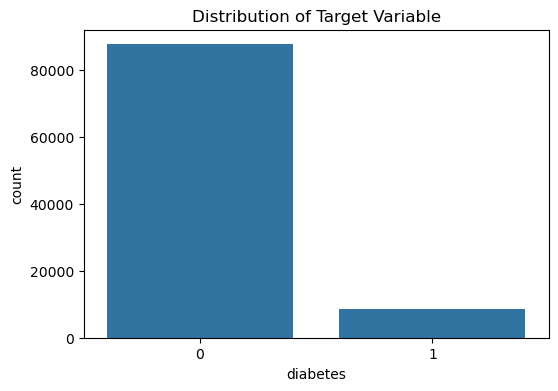

In [18]:
#Check the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x=target,data=df)
plt.title("Distribution of Target Variable")
plt.show()

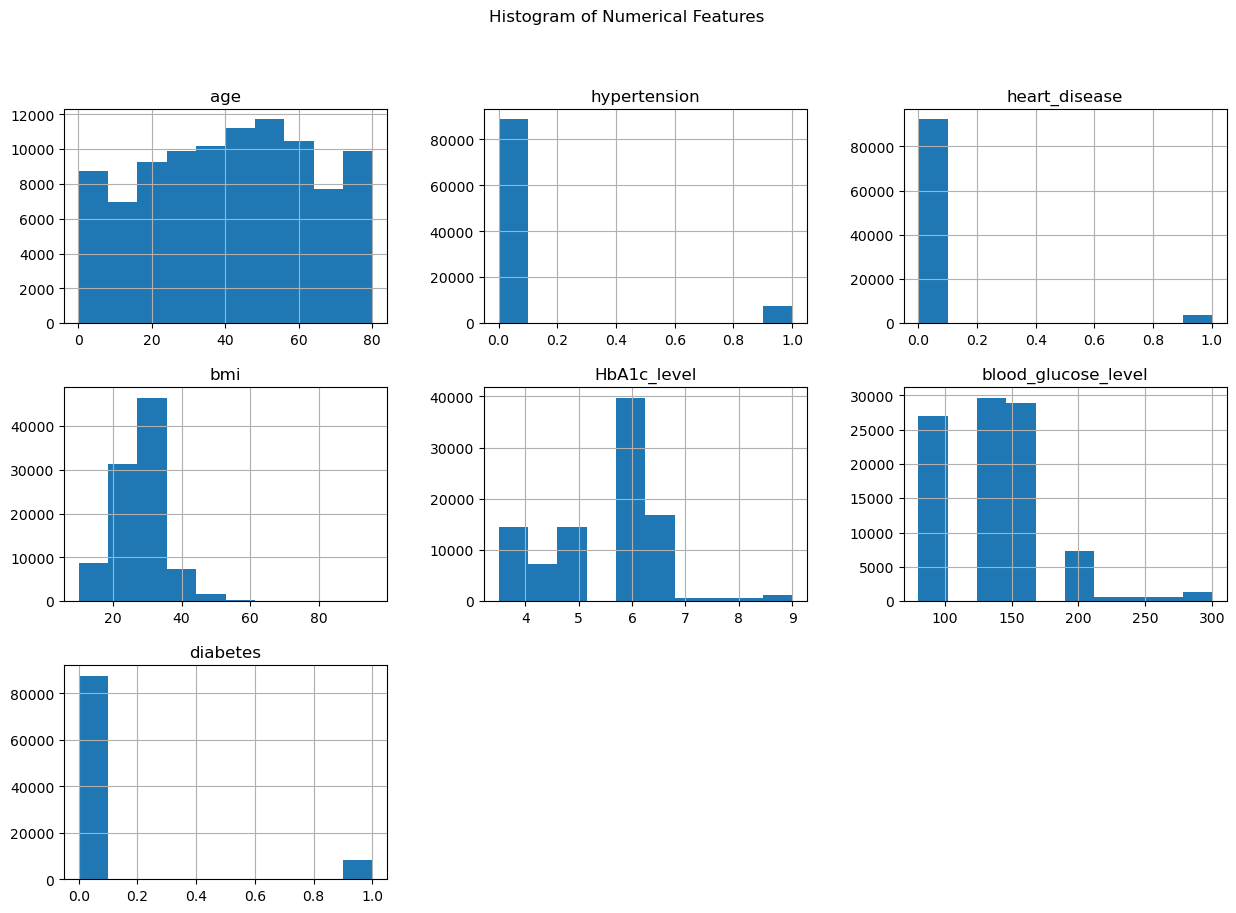

In [23]:
#Distribution of numerical features
numerical_features=df.select_dtypes(include=["int64","float64"]).columns
df[numerical_features].hist(figsize=(15,10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

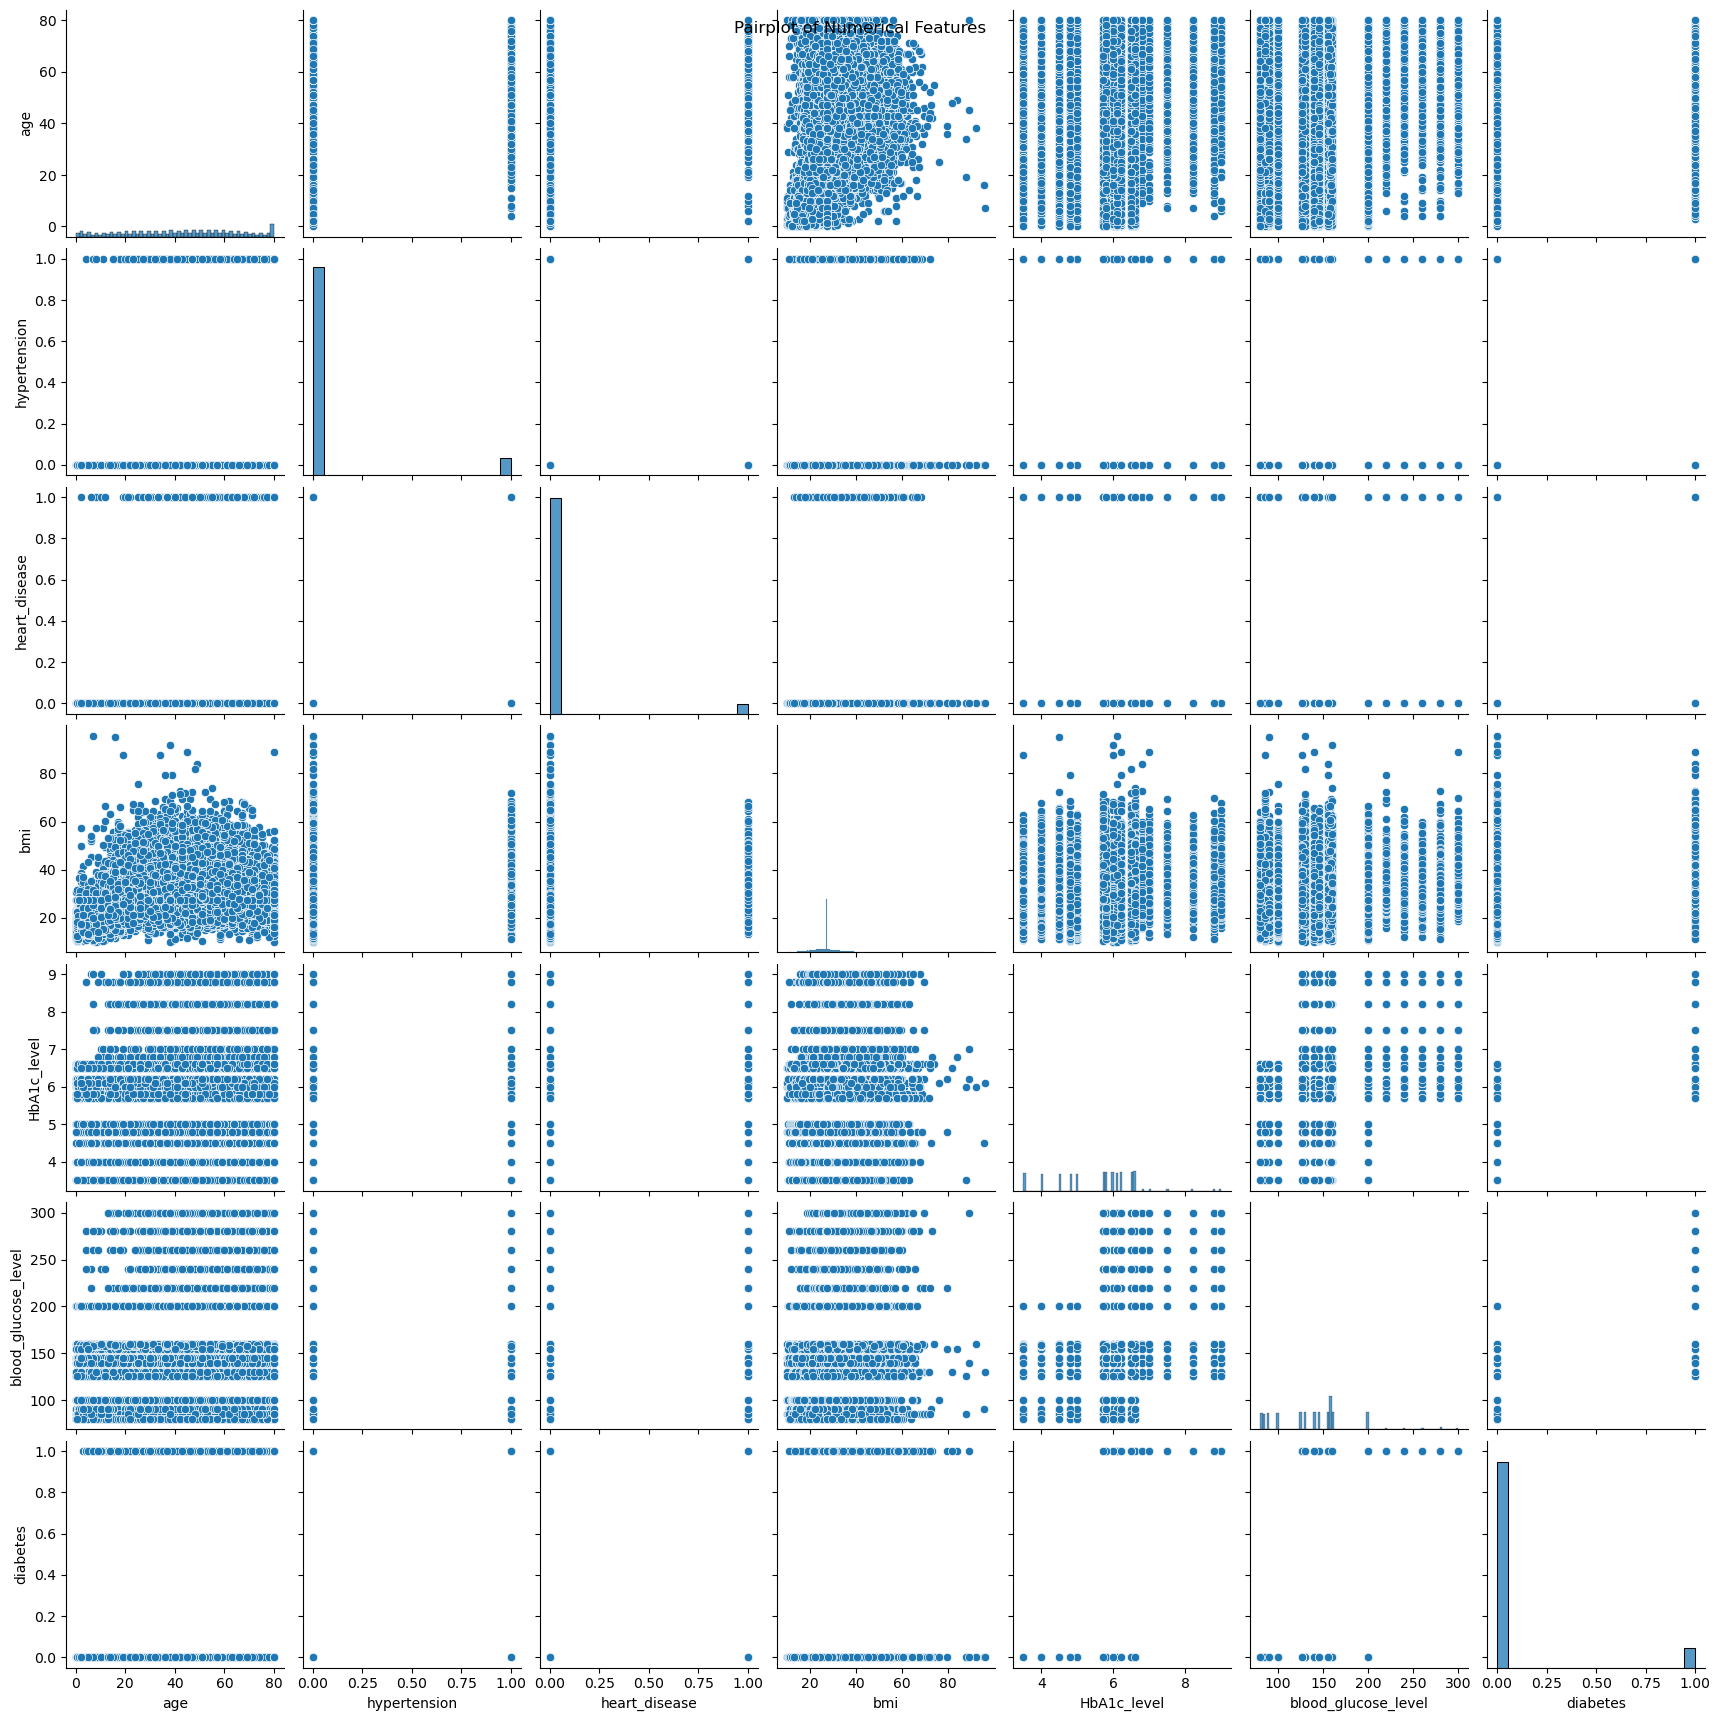

In [24]:
#Pairplot to see relationship between features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features")
plt.show()

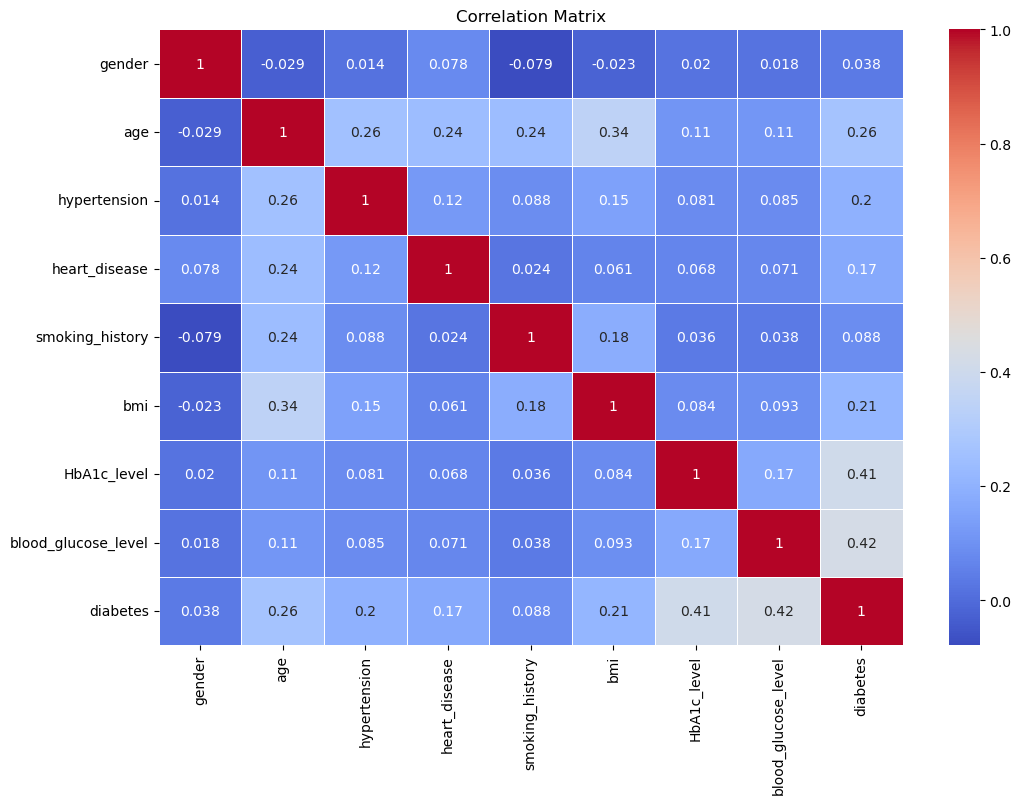

In [25]:
#Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

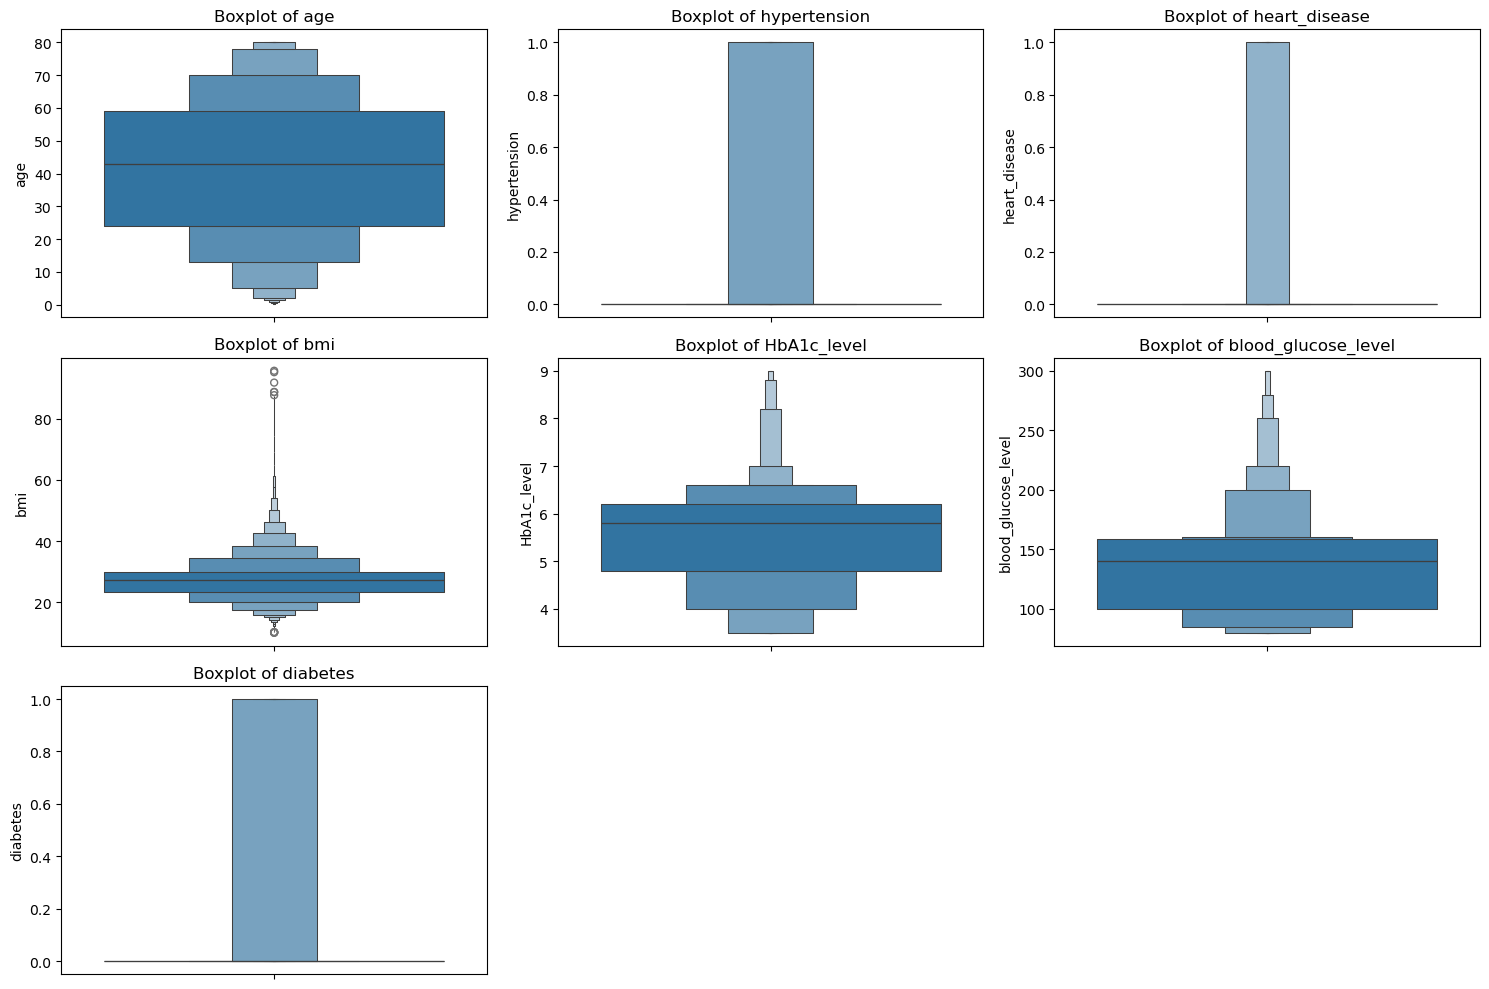

In [26]:
#Boxplots to check for outliners
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.boxenplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()